## Support Vector Classification Implementation

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Creating Data points
from sklearn.datasets import make_classification

In [4]:
X, Y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0)

<Axes: xlabel='0', ylabel='1'>

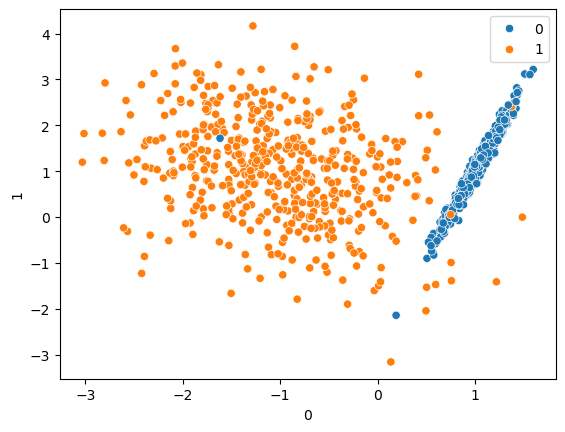

In [5]:
sns.scatterplot(x = pd.DataFrame(X)[0], y = pd.DataFrame(X)[1], hue = Y)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=10)

In [7]:
from sklearn.svm import SVC

In [8]:
svc = SVC(kernel = 'linear')

In [9]:
svc.fit(X_train, Y_train)

SVC(kernel='linear')

In [10]:
Y_pred = svc.predict(X_test)

In [11]:
from sklearn.metrics import classification_report,confusion_matrix

In [12]:
print(classification_report(Y_test, Y_pred))
print(confusion_matrix(Y_test, Y_pred))      

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       119
           1       1.00      0.97      0.98       131

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250

[[119   0]
 [  4 127]]


In [26]:
# Using rbf kernel 
rbf = SVC(kernel = 'rbf')

In [28]:
rbf.fit(X_train, Y_train)

SVC()

In [34]:
Y_pred2 = svc.predict(X_test)

In [36]:
print(classification_report(Y_test, Y_pred2))
print(confusion_matrix(Y_test, Y_pred2))      

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       119
           1       1.00      0.97      0.98       131

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250

[[119   0]
 [  4 127]]


### Hyperparameter Tuning with SVC

In [39]:
from sklearn.model_selection import GridSearchCV
# Defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']}

In [41]:
grid = GridSearchCV(SVC(), param_grid = param_grid, refit=True, cv=5, verbose=3)

In [43]:
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.980 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.953 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.980 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.973 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.973 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.993 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.920 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.967 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.947 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [45]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [47]:
# Prediction
Y_pred3 = grid.predict(X_test)
print(classification_report(Y_test, Y_pred3))
print(confusion_matrix(Y_test, Y_pred3))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       119
           1       1.00      0.98      0.99       131

    accuracy                           0.99       250
   macro avg       0.99      0.99      0.99       250
weighted avg       0.99      0.99      0.99       250

[[119   0]
 [  2 129]]
